Data set used: https://www.kaggle.com/datasets/simonezappatini/body-fat-extended-dataset

# Main objective: to find the relationship between "Sex" and "weight" 

In [32]:
# Importing numpy pandas mathplotand and other methods
import pandas as pd                        # data manipulation
import numpy as np                         # perform mathmatical operations 
import matplotlib.pyplot as plt            # for data visualization
%matplotlib inline
import seaborn as sns                      # for data visualization

In [33]:
# Reading the data file
df= pd.read_csv('bodyfat.csv')

In [34]:
# Complete information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BodyFat   436 non-null    float64
 1   Original  436 non-null    object 
 2   Sex       436 non-null    object 
 3   Age       436 non-null    int64  
 4   Weight    436 non-null    float64
 5   Height    436 non-null    float64
 6   Neck      436 non-null    float64
 7   Chest     436 non-null    float64
 8   Abdomen   436 non-null    float64
 9   Hip       436 non-null    float64
 10  Thigh     436 non-null    float64
 11  Knee      436 non-null    float64
 12  Ankle     436 non-null    float64
 13  Biceps    436 non-null    float64
 14  Forearm   436 non-null    float64
 15  Wrist     436 non-null    float64
dtypes: float64(13), int64(1), object(2)
memory usage: 54.6+ KB


# From the above info we can find that:
- The entries in this dataset ranges from 0 to 436.
- There are total of 16 columns.
- The data types included are float, integer and object.
- Object means anything other than numerical value.
- Its memory usage is 54.6+ KB
- Non-null means that a value is there. In this case Location : has 436 n0n-null values.

In [35]:
# Quick look to dataset
df.head(200)

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,Y,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,Y,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,Y,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,Y,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,Y,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,25.5,Y,M,42,81.65,1.73,38.5,101.6,96.6,100.6,61.1,38.4,24.1,32.9,29.8,18.8
196,22.0,Y,M,42,70.87,1.75,35.5,97.8,86.0,96.2,57.7,38.6,24.0,31.2,27.3,17.4
197,17.7,Y,M,42,76.20,1.82,36.5,92.0,89.7,101.0,62.3,38.0,22.3,30.8,27.8,16.9
198,6.6,Y,M,42,75.86,1.85,37.6,94.0,78.0,99.0,57.5,40.0,22.5,30.6,30.0,18.5


In [36]:
# Quick look to dataset from bottom
df.tail(200)

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
236,24.80,Y,M,62,86.8600,1.8400,40.6,104.0,98.2,101.1,59.3,40.3,23.0,32.6,28.5,19.0
237,27.30,Y,M,63,99.4100,1.7700,40.2,117.6,113.8,111.8,63.4,41.1,22.3,35.1,29.6,18.5
238,12.40,Y,M,64,70.4200,1.7700,37.9,95.8,82.8,94.5,61.2,39.1,22.3,29.8,28.9,18.3
239,29.90,Y,M,65,86.0700,1.6700,40.8,106.4,100.5,100.5,59.2,38.1,24.0,35.9,30.5,19.1
240,17.00,Y,M,65,57.8300,1.6700,34.7,93.0,79.7,87.6,50.7,33.4,20.1,28.5,24.8,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,30.40,N,F,23,59.8752,1.5621,31.3,89.0,71.0,98.5,56.0,36.2,21.0,28.0,24.5,16.3
432,7.47,N,F,21,48.5352,1.5748,29.5,79.0,62.5,89.0,49.0,33.0,20.0,25.0,22.0,15.5
433,11.98,N,F,20,51.7104,1.5748,31.5,81.5,61.5,90.0,49.5,32.0,19.5,27.5,22.5,15.0
434,11.24,N,F,22,50.8032,1.6510,30.5,85.0,64.0,88.0,45.0,32.0,19.5,24.0,21.5,15.0


In [37]:
# Number of rows
print(len(df)) 

436


In [38]:
# Number of columns
print(len(df.columns))  

16


In [39]:
# Shape of Dataset (rows and columns)
df.shape  

(436, 16)

In [40]:
# Print names of columns
df.columns      

Index(['BodyFat', 'Original', 'Sex', 'Age', 'Weight', 'Height', 'Neck',
       'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps',
       'Forearm', 'Wrist'],
      dtype='object')

In [41]:
#Print summary statistics
df.describe()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,20.249839,34.545872,72.282203,1.734048,35.250917,94.158028,82.816055,98.652294,56.039679,37.365596,22.351835,29.897248,26.482110,17.139908
std,7.502125,15.500099,15.464366,0.098359,3.837908,10.931688,14.652729,6.895034,6.194143,2.768403,1.780513,3.944843,3.155306,1.582291
min,0.000000,1.000000,42.184800,0.750000,26.000000,43.000000,58.000000,82.500000,38.000000,24.700000,18.000000,20.500000,20.000000,13.500000
25%,15.022500,21.000000,59.875200,1.668780,31.500000,85.500000,70.000000,94.000000,51.500000,35.400000,21.000000,26.950000,23.700000,16.000000
50%,20.500000,28.500000,70.815800,1.730000,35.450000,93.050000,82.850000,98.300000,56.000000,37.500000,22.300000,29.800000,26.650000,17.300000
75%,25.410000,46.000000,81.560000,1.800000,38.300000,101.425000,93.225000,102.500000,60.000000,39.000000,23.300000,32.625000,29.200000,18.400000
max,47.500000,81.000000,164.720000,1.970000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


# Interpret 

### Weight
- Here, the most obese person is observed to have 164kg weight,
- The lowest weight is 42kg,
- Mean weight is 72kg
- Most of the weight in this dataset is observed to be around 81kg,

# Missing value

In [42]:
# Inspecting the missing values in the dataset
print(df.isnull().values.sum())

# Replacing the ' 's with NaN
df = df.replace(" ",np.NaN)

# Impute the missing values with mean imputation
df = df.fillna(df.mean(numeric_only=True))

# Count the number of NaNs in the dataset to verify
print(df.isnull().values.sum())


0
0


In [43]:
print(df.isnull())

     BodyFat  Original    Sex    Age  Weight  Height   Neck  Chest  Abdomen  \
0      False     False  False  False   False   False  False  False    False   
1      False     False  False  False   False   False  False  False    False   
2      False     False  False  False   False   False  False  False    False   
3      False     False  False  False   False   False  False  False    False   
4      False     False  False  False   False   False  False  False    False   
..       ...       ...    ...    ...     ...     ...    ...    ...      ...   
431    False     False  False  False   False   False  False  False    False   
432    False     False  False  False   False   False  False  False    False   
433    False     False  False  False   False   False  False  False    False   
434    False     False  False  False   False   False  False  False    False   
435    False     False  False  False   False   False  False  False    False   

       Hip  Thigh   Knee  Ankle  Biceps  Forearm  W

When the data is not missing any values we are good to go for EDA cycle

# EDA CYCLE

### Histogram

In [44]:
# Checking the data type as Histogram excepts either integer and float

print(df['Sex'].dtype)
print(df['Weight'].dtype)

object
float64


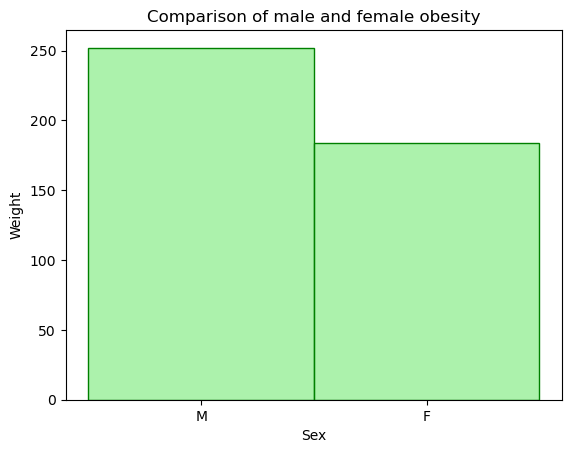

In [45]:
sns.histplot(df['Sex'], bins = 12, color = 'lightgreen', kde = False, edgecolor = 'green')


# Add labels
plt.title('Comparison of male and female obesity')
plt.xlabel('Sex')
plt.ylabel('Weight')


# Show the plot
plt.show()


- It is right skewed. 

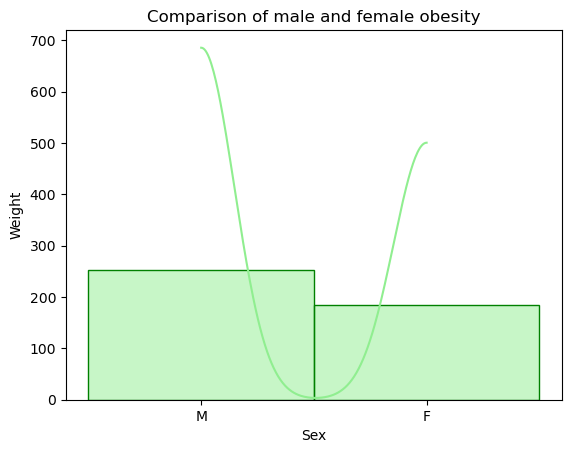

In [46]:
# With kde
sns.histplot(df['Sex'], bins = 10, color = 'lightgreen', kde = True, edgecolor = 'green')


# Add labels
plt.title('Comparison of male and female obesity')
plt.xlabel('Sex')
plt.ylabel('Weight')

# Show the plot
plt.show()

### Scatterplot

In [47]:
# Checking the data type as scatterplot excepts either integer and float
print(df['Sex'].dtype)
print(df['Weight'].dtype)


object
float64


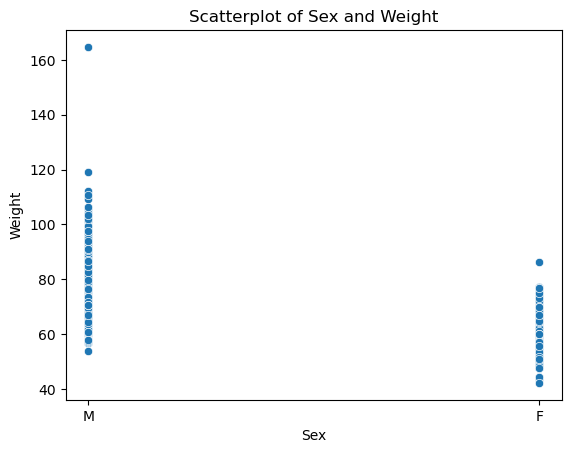

In [48]:
# Seaborn Scatterplot     - mostly used if we have numerical values on both x and y and want to see the relation between them
sns.scatterplot(x=df['Sex'], y=df['Weight'])  # hue shows U- urban and R-rural


# Optionally, add labels and title
plt.title('Scatterplot of Sex and Weight')    # Overwrites already shown output in matplotlib. 
plt.xlabel('Sex')                                 # Shows without these as well. And they both work on same engine.
plt.ylabel('Weight')                             # Engine - seaborn --- accessed by sns.

#Show the plot           matplotlib covered one.
plt.show()

Here, the data is concentrated between 60 and 100 for male category whereas for females it is observed that the data is mostly concentrated between 40 to 80. We can also observe a outlier in both male and female category at above 160 and 80.

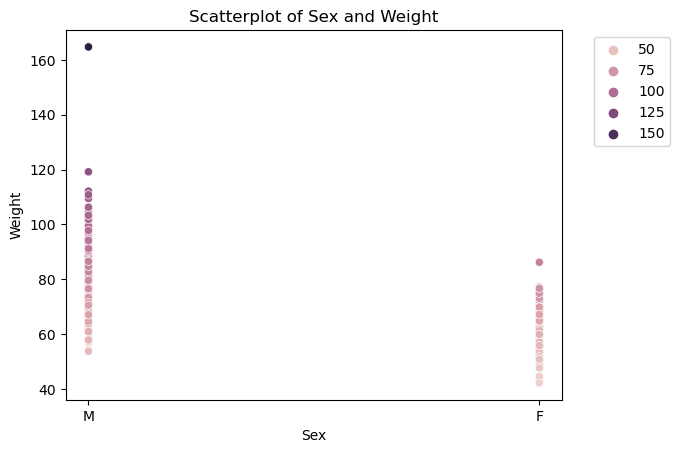

In [49]:
# Scatterplot with hue 
sns.scatterplot(x=df['Sex'], y=df['Weight'], hue =df['Weight'])  # hue displays the weight

# Move the legend outside the plot area so it does no obstruct the view.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.title('Scatterplot of Sex and Weight')    
plt.xlabel('Sex')                                
plt.ylabel('Weight')                          

plt.show()

C:\Users\omraj\AppData\Local\Temp\ipykernel_6684\1703224776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'], hist=True, kde=False,


Text(0, 0.5, 'Count')

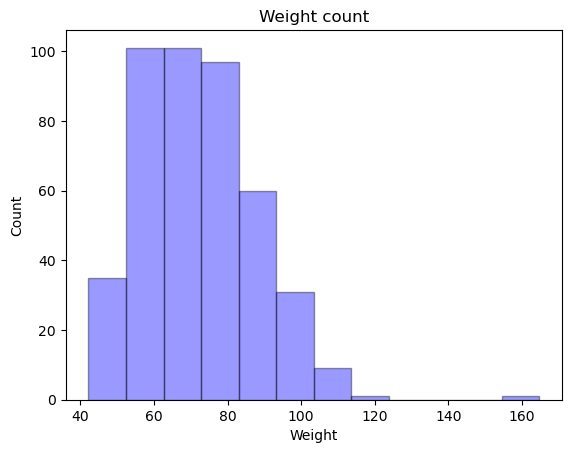

In [50]:
# seaborn histogram 
sns.distplot(df['Weight'], hist=True, kde=False, 
             bins=12, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Adding labels
plt.title('Weight count')
plt.xlabel('Weight')

plt.ylabel('Count')

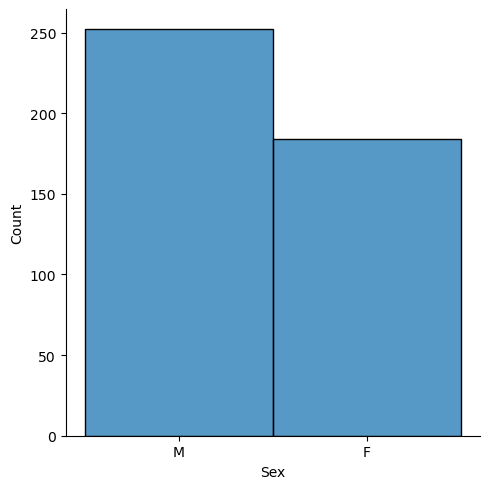

In [51]:
sns.displot(data=df,x="Sex", kind="hist")

<AxesSubplot: xlabel='Sex', ylabel='Weight'>

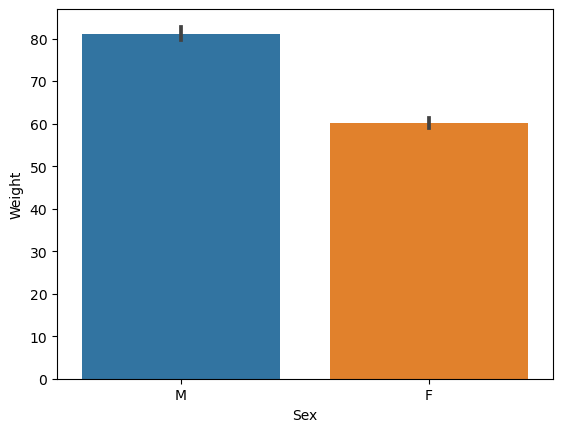

In [52]:
sns.barplot(data=df,x='Sex',y='Weight')

<AxesSubplot: xlabel='Sex', ylabel='Weight'>

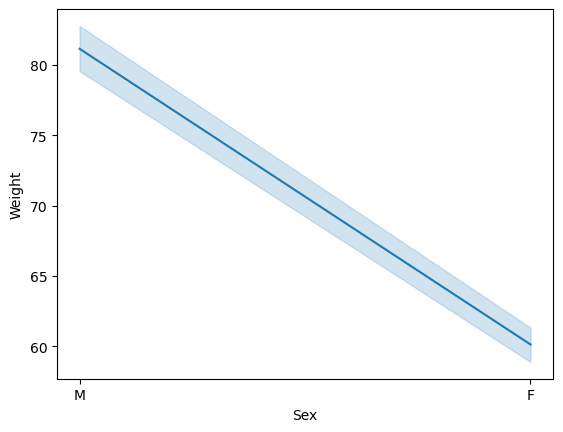

In [53]:
# line plot 
sns.lineplot(x='Sex',y='Weight', data=df )

Text(0, 0.5, 'Weight')

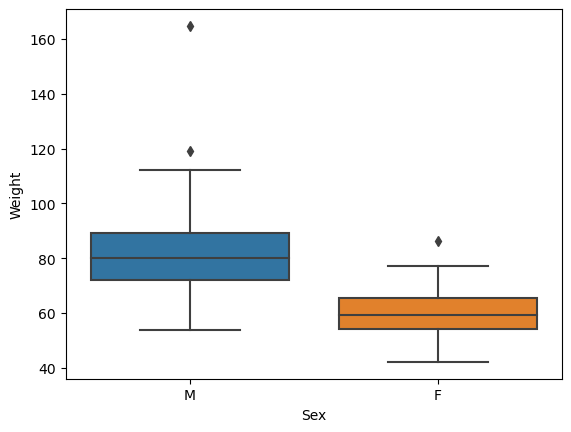

In [54]:
#box plot
sns.boxplot(y = 'Weight',data= df, x= 'Sex')
plt.xlabel('Sex')
plt.ylabel('Weight')

C:\Users\omraj\AppData\Local\Temp\ipykernel_6684\4218888453.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


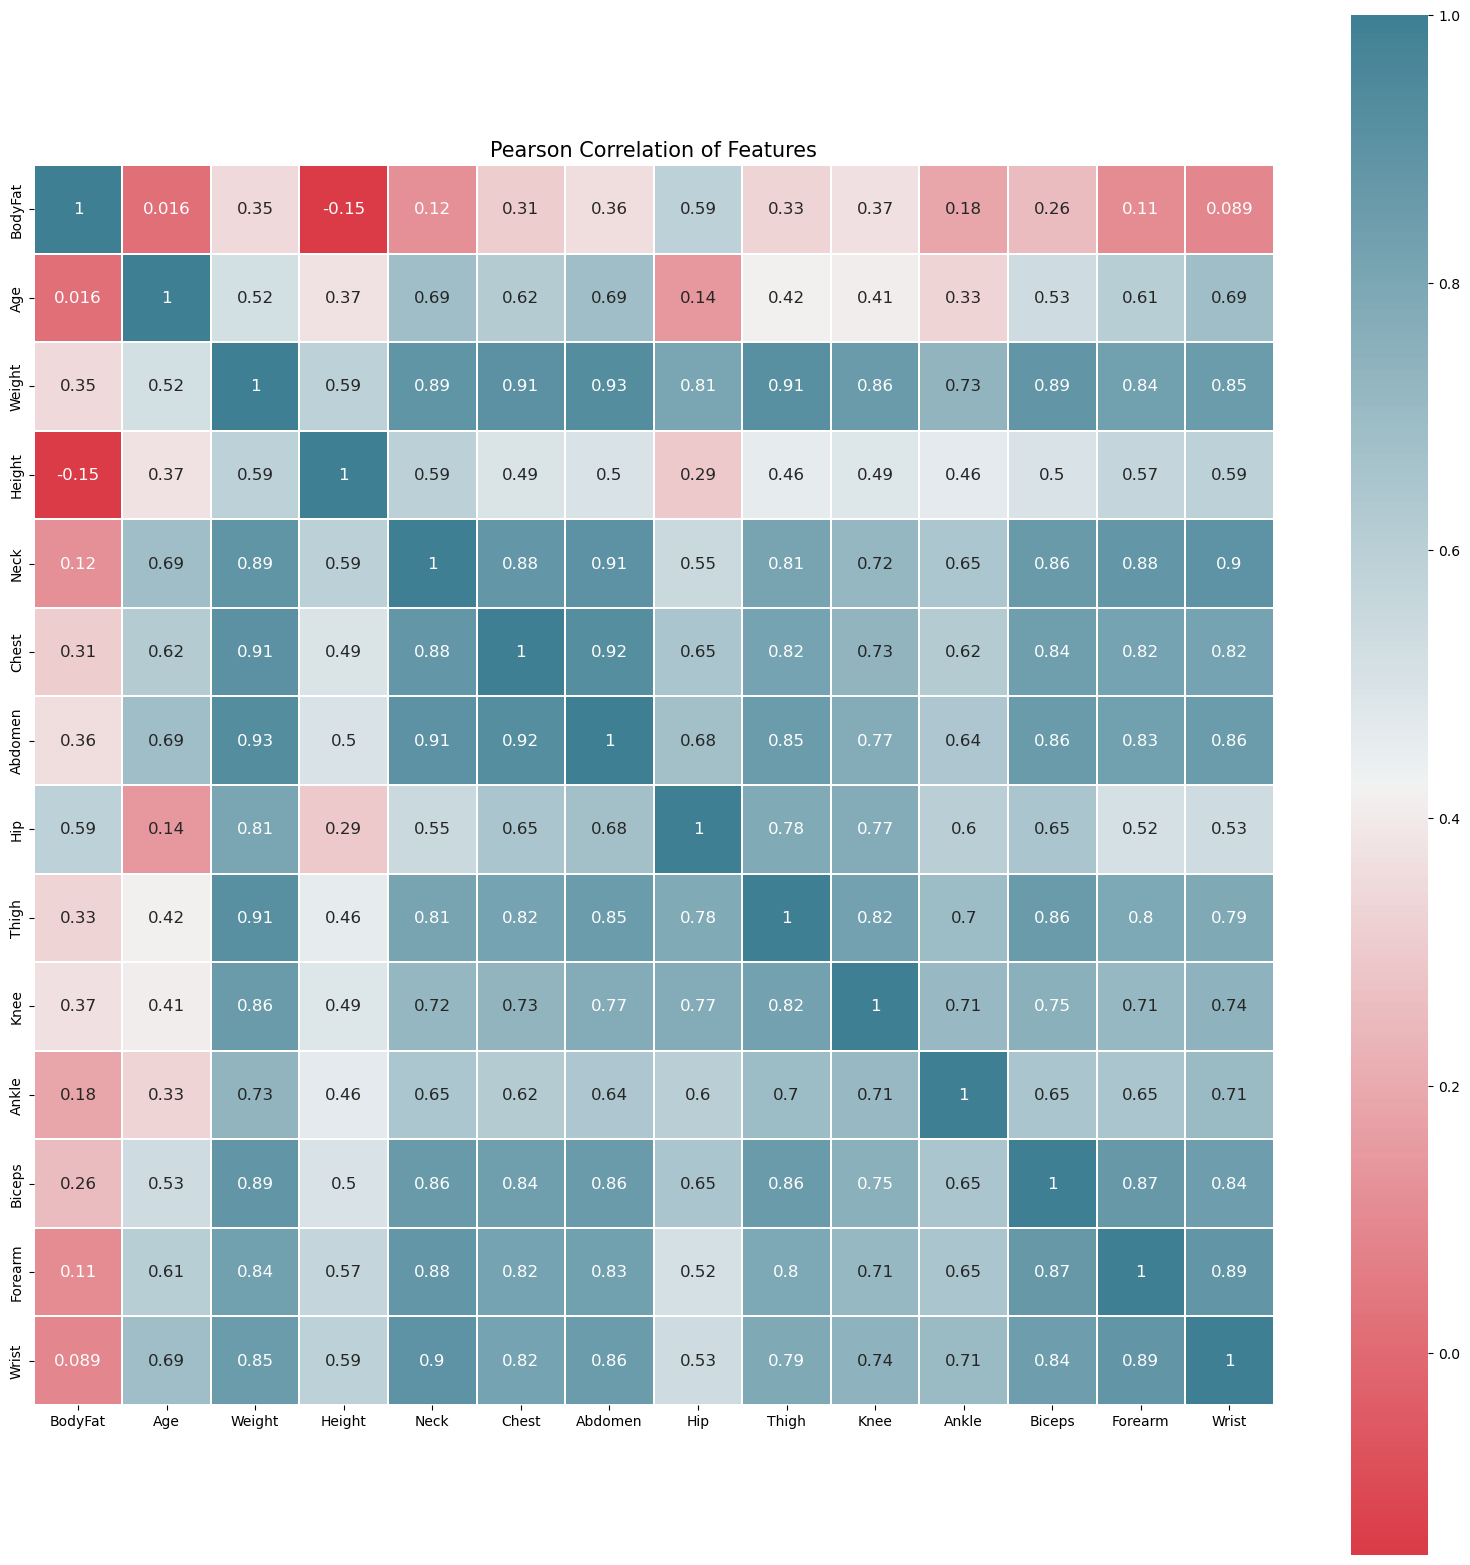

In [55]:
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(df.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()

# In above correlation matrix, the number close to 1.00 is highly corelated

Since our objective is to check the relationship between sex and weight which is not possible so we will check the relation between age and weight, we can observe that the "Age" and "Weight" have value 0.52 which is close to 1 so they are corelated.

# To sum all of the above, Males are observed to be more obese than Females. 